## Exercise 1 – Descriptive Analytics and Visualization using Matplotlib, Seaborn: (Cross tabulation, distributions, Multi-variate analysis, Various Plots)

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as st
import matplotlib.pyplot as plt

In [3]:
del_df = pd.read_csv("deliveries.csv")
mat_df = pd.read_csv("matches.csv")

In [4]:
del_df

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179073,11415,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,SR Watson,SL Malinga,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
179074,11415,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,RA Jadeja,SL Malinga,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN
179075,11415,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,RA Jadeja,SL Malinga,0,...,0,0,0,0,1,0,1,SR Watson,run out,KH Pandya
179076,11415,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,RA Jadeja,SL Malinga,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN


In [5]:
mat_df

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,11347,2019,Mumbai,05/05/19,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi
752,11412,2019,Chennai,07/05/19,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould
753,11413,2019,Visakhapatnam,08/05/19,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN
754,11414,2019,Visakhapatnam,10/05/19,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin


### Data preprocessing

In [6]:
mat_df.loc[:, "toss_winner"].mask(mat_df["toss_winner"] == "Rising Pune Supergiant", other="Rising Pune Supergiants", inplace=True)

### Q1) Count the total number of matches conducted in the year 2008

In [7]:
len(mat_df[mat_df["season"] == 2008].value_counts())

0

### Q2) Find the city name where maximum and minimum number of matches conducted. 

In [8]:
mat_df["city"].value_counts().idxmax()

'Mumbai'

In [9]:
mat_df["city"].value_counts().idxmin()

'Bloemfontein'

### Q3) Find total count of matches city wise.

,city
Mumbai,101
Kolkata,77
Delhi,74
Bangalore,66
Hyderabad,64
Chennai,57
Jaipur,47
Chandigarh,46
Pune,38
Durban,15


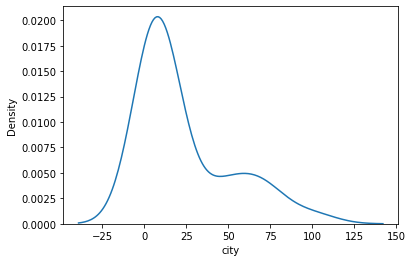

In [10]:
temp = pd.DataFrame(mat_df["city"].value_counts())
sns.kdeplot(data=temp, x="city")
temp

### Q4) Find the Team which is maximum and minimum toss winner.


In [11]:
mat_df["toss_winner"].value_counts().idxmax()

'Mumbai Indians'

In [12]:
mat_df["toss_winner"].value_counts().idxmin()

'Kochi Tuskers Kerala'

### Q5)  Check the toss decision that the team has taken.

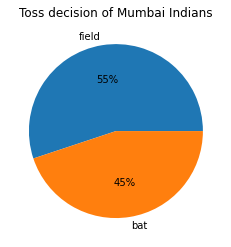

'field'

In [13]:
temp = mat_df[mat_df["toss_winner"] == "Mumbai Indians"]["toss_decision"].value_counts()
plt.pie(temp, labels=["field", "bat"], autopct="%0.0f%%")
plt.title("Toss decision of Mumbai Indians")
plt.show()

temp.idxmax()

### Q6) Count the total number of normal and tie matches.

In [14]:
mat_df[mat_df["result"] == "normal"].shape[0]

743

In [15]:
mat_df[mat_df["result"] == "tie"].shape[0]

9

### Q7) Find the team names where the match result is tie

In [16]:
mat_df[mat_df["result"] == "tie"][["team1", "team2"]]

,team1,team2
33,Gujarat Lions,Mumbai Indians
125,Rajasthan Royals,Kolkata Knight Riders
189,Kings XI Punjab,Chennai Super Kings
387,Royal Challengers Bangalore,Sunrisers Hyderabad
400,Delhi Daredevils,Royal Challengers Bangalore
475,Rajasthan Royals,Kolkata Knight Riders
535,Rajasthan Royals,Kings XI Punjab
705,Kolkata Knight Riders,Delhi Capitals
746,Mumbai Indians,Sunrisers Hyderabad


### Q8) Find the team name who won the match by highest runs.

In [17]:
mat_df.loc[mat_df["win_by_runs"].idxmax(), "winner"]

'Mumbai Indians'

### Q9) Find the team name who won the match by lowest runs.


In [18]:
mat_df.loc[mat_df["win_by_runs"].idxmin(), "winner"]

'Rising Pune Supergiant'

### Q10) Find the players who was awarded “Player of the match” more than 3 times.


In [19]:
temp = pd.DataFrame(mat_df["player_of_match"].value_counts())
temp[temp["player_of_match"] > 3]

,player_of_match
CH Gayle,21
AB de Villiers,20
RG Sharma,17
MS Dhoni,17
DA Warner,17
...,...
SK Warne,4
CA Lynn,4
SS Iyer,4
ML Hayden,4


### Q11) Find the player who was awarded as player of the match maximum times.

In [20]:
mat_df["player_of_match"].value_counts().idxmax()

'CH Gayle'

### Q12)  Find the Venue where the team won the match by highest runs.


In [21]:
mat_df.loc[mat_df["win_by_runs"].idxmax(), "venue"]

'Feroz Shah Kotla'

### Q13)  Find the Venue where the team won the match by lowest runs.

In [22]:
mat_df.loc[mat_df["win_by_runs"].idxmin(), "venue"]

'Maharashtra Cricket Association Stadium'

### Q14) Find the Umpires who did umpiring maximum times.

In [23]:
pd.concat([mat_df["umpire1"], mat_df["umpire2"], mat_df["umpire3"]]).value_counts().idxmax()

'S Ravi'

### Q15) Find the Total matches played in each season

,season
2013,76
2012,74
2011,73
2010,60
2014,60
2016,60
2018,60
2019,60
2017,59
2015,59


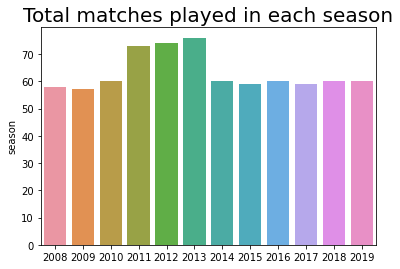

In [24]:
total = pd.DataFrame(mat_df["season"].value_counts())
sns.barplot(data=total, x=total.index, y="season")
plt.title("Total matches played in each season", size=20)

total

In [25]:
df = pd.merge(mat_df, del_df, left_on="id", right_on="match_id")
df

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179073,11415,2019,Hyderabad,12/05/19,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
179074,11415,2019,Hyderabad,12/05/19,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN
179075,11415,2019,Hyderabad,12/05/19,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,...,0,0,0,0,1,0,1,SR Watson,run out,KH Pandya
179076,11415,2019,Hyderabad,12/05/19,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN


### Q16)  Find the Total runs in each season

In [26]:
df.groupby(by="season")[["total_runs"]].count()

,total_runs
season,
2008,13489
2009,13606
2010,14498
2011,17013
2012,17767
2013,18177
2014,14300
2015,13652
2016,14096


### Q17)  No. of tosses won by each team

In [27]:
mat_df["toss_winner"].value_counts()

Mumbai Indians                 98
Kolkata Knight Riders          92
Chennai Super Kings            89
Royal Challengers Bangalore    81
Kings XI Punjab                81
Delhi Daredevils               80
Rajasthan Royals               80
Sunrisers Hyderabad            46
Deccan Chargers                43
Pune Warriors                  20
Gujarat Lions                  15
Rising Pune Supergiants        13
Delhi Capitals                 10
Kochi Tuskers Kerala            8
Name: toss_winner, dtype: int64

### Q18) Visualize the Toss decision across seasons

<AxesSubplot:ylabel='Density'>

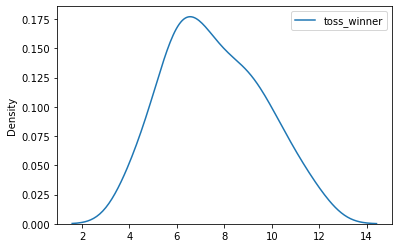

In [28]:
toss_df = pd.DataFrame(mat_df.groupby("season")["toss_winner"].value_counts())
sns.kdeplot(data=toss_df)


### Q19)  Find the Dismissal Kind and Visualize using best fit graph

In [29]:
dk_df = pd.DataFrame(del_df[del_df["dismissal_kind"].notna()]["dismissal_kind"].value_counts())
dk_df

,dismissal_kind
caught,5348
bowled,1581
run out,852
lbw,540
stumped,278
caught and bowled,211
retired hurt,12
hit wicket,10
obstructing the field,2


### Q20)  Find the Top 10 run scorers in IPL and Visualize using best fit graph

,batsman
V Kohli,4211
SK Raina,4044
RG Sharma,3816
S Dhawan,3776
G Gambhir,3524
RV Uthappa,3492
DA Warner,3398
MS Dhoni,3318
AM Rahane,3215
CH Gayle,3131


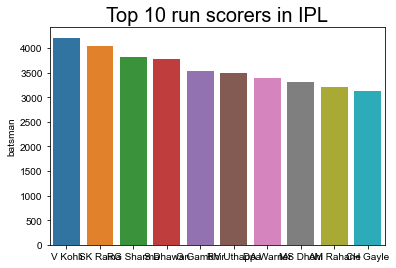

In [30]:
top_df = pd.DataFrame(del_df.sort_values(by="total_runs")["batsman"].value_counts().head(10))

sns.barplot(data=top_df, x=top_df.index, y="batsman")
sns.set(rc={'figure.figsize':(15,12)})
plt.title("Top 10 run scorers in IPL", size=20)

top_df

### Q21)  Visualize the Highest MOM award winners

,player_of_match
CH Gayle,21
AB de Villiers,20
RG Sharma,17
MS Dhoni,17
DA Warner,17
YK Pathan,16
SR Watson,15
SK Raina,14
G Gambhir,13
MEK Hussey,12


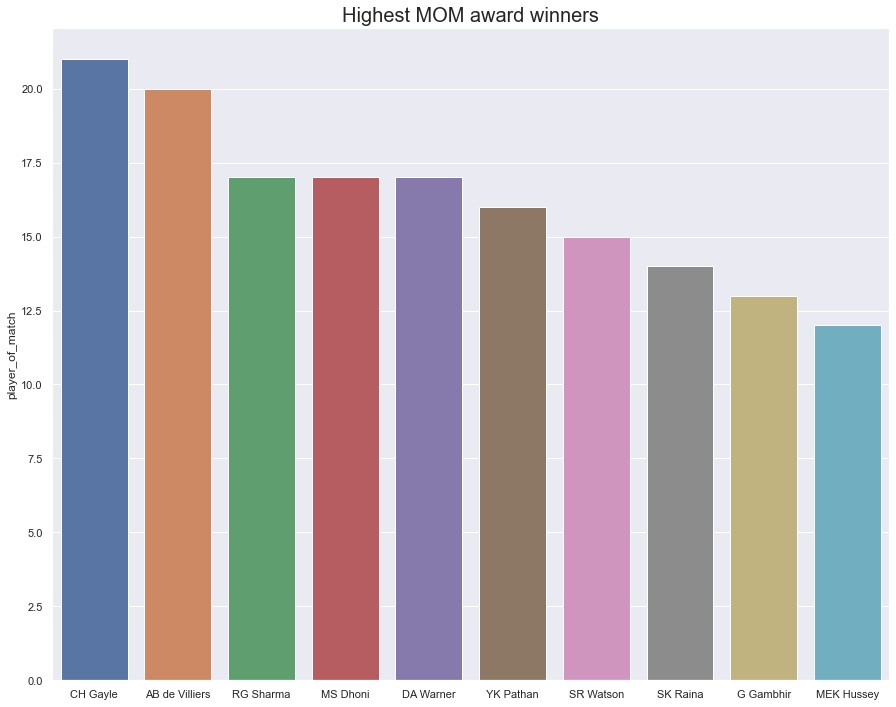

In [31]:
mom = pd.DataFrame(mat_df["player_of_match"].value_counts()).head(10)

sns.barplot(data=mom, x=mom.index, y="player_of_match")
plt.title("Highest MOM award winners", size=20)

mom

### Q22) Find Total Number of Played Matches by each team

In [37]:
pd.DataFrame(pd.concat([mat_df["team1"], mat_df["team2"]]).value_counts(), columns=["amount"])

,amount
Mumbai Indians,187
Royal Challengers Bangalore,180
Kolkata Knight Riders,178
Kings XI Punjab,176
Chennai Super Kings,164
Delhi Daredevils,161
Rajasthan Royals,147
Sunrisers Hyderabad,108
Deccan Chargers,75
Pune Warriors,46
